In [30]:
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
from scipy.stats import entropy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Load your MSA (replace 'opsin_msa.fasta' with your file)
alignment = AlignIO.read("wt_aligned_VPOD_1_gap_dropped.fasta", "fasta")
summary_align = AlignInfo.SummaryInfo(alignment)
# Get amino acid frequencies at each position
freqs = summary_align.pos_specific_score_matrix(chars_to_ignore=['-', 'X', 'O', 'Z'])


rel_entropies = []
for pos in range(len(alignment[0])):
#for pos in freqs:
    # Extract frequencies for the current position as a list
    pos_freqs = list(freqs[pos].values())

    # Normalize frequencies
    total = sum(pos_freqs)
    pos_freqs = [freq / total for freq in pos_freqs]

    # Calculate entropy for the normalized frequencies
    rel_entropies.append(entropy(pos_freqs))

In [16]:
# Normalize relative entropy to 0-1 scale
rel_ent_min = min(rel_entropies)
rel_ent_max = max(rel_entropies)
relative_entropy_norm = [(x - rel_ent_min) / (rel_ent_max - rel_ent_min) for x in rel_entropies]

In [28]:
colors = []
for val in relative_entropy_norm:
    if val < 0.2:
        colors.append('#810f7c')  # Highly conserved
    elif val < 0.5:
        colors.append('#253494')  # Moderately conserved
    else:
        colors.append('#41b6c4')   # Variable

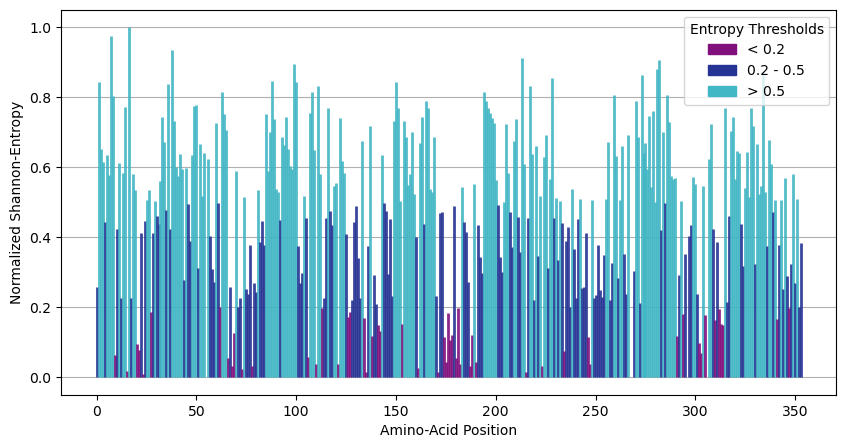

In [33]:
plt.figure(figsize=(10, 5))
# Create legend handles (patches with the colors)
legend_handles = [
    mpatches.Patch(color='#810f7c', label='< 0.2'),
    mpatches.Patch(color='#253494', label='0.2 - 0.5'),
    mpatches.Patch(color='#41b6c4', label='> 0.5')  # Adjust labels to your actual thresholds
]
# Add the legend to the plot
plt.legend(handles=legend_handles, title='Entropy Thresholds', loc='upper right')
plt.vlines(x=range(len(relative_entropy_norm)), ymin=0, ymax=relative_entropy_norm, color=colors, linewidth=2, alpha = 0.9)
plt.xlabel('Amino-Acid Position')
plt.ylabel('Normalized Shannon-Entropy')
#plt.title('Relative Entropy')
plt.grid(axis='y')
fileout = 'shannon_ent_plot_wt2.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()


In [27]:
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
from scipy.stats import entropy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Load your MSA (replace 'opsin_msa.fasta' with your file)
alignment = AlignIO.read("wt_aligned_VPOD_1_gap_dropped.fasta", "fasta")
summary_align = AlignInfo.SummaryInfo(alignment)

In [ ]:
background_freqs = {
    'A': 0.0826, 'C': 0.0139, 'D': 0.0546, 'E': 0.0672, 'F': 0.0387, 
    'G': 0.0707, 'H': 0.0228, 'I': 0.0591, 'K': 0.0580, 'L': 0.0965, 
    'M': 0.0241, 'N': 0.0406, 'P': 0.0475, 'Q': 0.0393, 'R': 0.0553, 
    'S': 0.0665, 'T': 0.0536, 'V': 0.0686, 'W': 0.0110, 'Y': 0.0292 
}

In [29]:
# Calculate relative entropy for each position
cont_list = []
for pos in range(len(alignment[0])):  
    inf_con = summary_align.information_content(chars_to_ignore=['-', 'X', 'O', 'Z'], e_freq_table=background_freqs, start=pos,end=pos+1)
    cont_list.append(inf_con)

In [15]:
cont_min = min(cont_list)
cont_max = max(cont_list)
cont_norm = [(x - cont_min) / (cont_max - cont_min) for x in cont_list]

In [16]:
colors = []
for val in cont_norm:
    if val < 0.2:
        colors.append('#810f7c')  # Low Information
    elif val < 0.5:
        colors.append('#253494')  # Moderately Information
    else:
        colors.append('#41b6c4')   # High Information

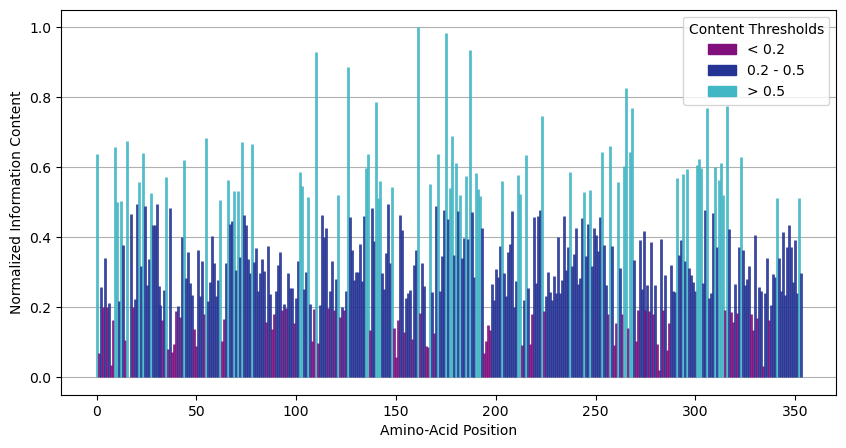

In [18]:
plt.figure(figsize=(10, 5))
# Create legend handles (patches with the colors)
legend_handles = [
    mpatches.Patch(color='#810f7c', label='< 0.2'),
    mpatches.Patch(color='#253494', label='0.2 - 0.5'),
    mpatches.Patch(color='#41b6c4', label='> 0.5')  # Adjust labels to your actual thresholds
]
# Add the legend to the plot
plt.legend(handles=legend_handles, title='Content Thresholds', loc='upper right')
plt.vlines(x=range(len(cont_norm)), ymin=0, ymax=cont_norm, color=colors, linewidth=2, alpha = 0.9)
plt.xlabel('Amino-Acid Position')
plt.ylabel('Normalized Information Content')
#plt.title('Relative Entropy')
plt.grid(axis='y')
fileout = 'information_content_plot_wt2.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()


In [2]:
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np

# Load your MSA (replace 'opsin_msa.fasta' with your file)
alignment = AlignIO.read("wt_aligned_VPOD_1_gap_dropped.fasta", "fasta")
summary_align = AlignInfo.SummaryInfo(alignment)

# Get amino acid frequencies at each position
freqs = summary_align.pos_specific_score_matrix(chars_to_ignore=['-', 'X', 'O', 'Z'])

# Define background amino acid frequencies (replace with your actual values) // look for more options
background_freqs = {
    'A': 0.0826, 'C': 0.0139, 'D': 0.0546, 'E': 0.0672, 'F': 0.0387, 
    'G': 0.0707, 'H': 0.0228, 'I': 0.0591, 'K': 0.0580, 'L': 0.0965, 
    'M': 0.0241, 'N': 0.0406, 'P': 0.0475, 'Q': 0.0393, 'R': 0.0553, 
    'S': 0.0665, 'T': 0.0536, 'V': 0.0686, 'W': 0.0110, 'Y': 0.0292 
}

#maybe do against opsins instead of all proteins // use phylogentic tree



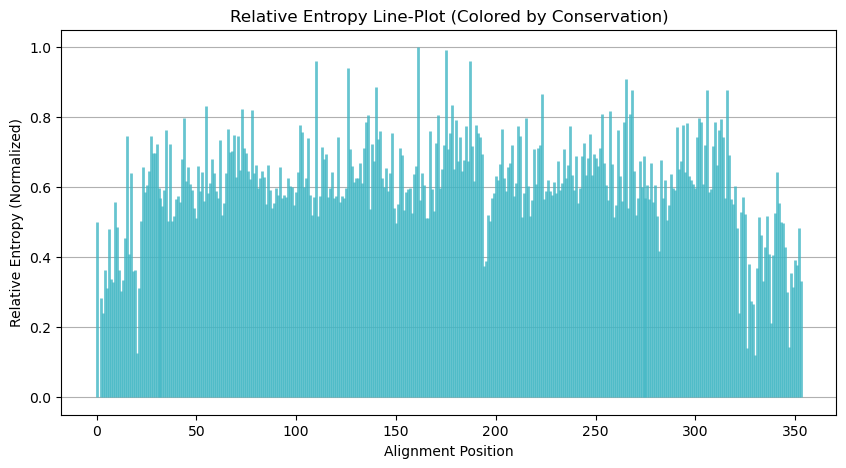

In [6]:
# Calculate relative entropy for each position
relative_entropy = []
for pos in range(len(alignment[0])):  
    rel_ent = 0
    for aa, bg_freq in background_freqs.items():
        obs_freq = freqs[pos][aa]  
        rel_ent += obs_freq * np.log2(obs_freq / bg_freq) if obs_freq > 0 else 0
    relative_entropy.append(rel_ent)

# Normalize relative entropy to 0-1 scale
rel_ent_min = min(relative_entropy)
rel_ent_max = max(relative_entropy)
relative_entropy_norm = [(x - rel_ent_min) / (rel_ent_max - rel_ent_min) for x in relative_entropy]


# Define color thresholds (adjust as needed)
highly_conserved_threshold = 0.2
moderately_conserved_threshold = 0.5

# Assign colors based on conservation level
colors = []
for val in relative_entropy_norm:
    if val < highly_conserved_threshold:
        colors.append('#ffffcc')  # Highly conserved
    elif val < moderately_conserved_threshold:
        colors.append('#41b6c4')  # Moderately conserved
    else:
        colors.append('#9e9ac8')   # Variable

# Plotting with customized colors
plt.figure(figsize=(10, 5))
plt.vlines(x=range(len(relative_entropy_norm)), ymin=0, ymax=relative_entropy_norm, color='#41b6c4', linewidth=2, alpha = 0.8)
plt.xlabel('Alignment Position')
plt.ylabel('Relative Entropy (Normalized)')
plt.title('Relative Entropy Line-Plot (Colored by Conservation)')
plt.grid(axis='y')
fileout = 'relative_ent_plot_wt2.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()